# Data Science Assignment : Chances of getting a booking canceled

1. Basic analysis of hotel booking data: Story using data about hotel booking
    * Perform data preprocessing and exploratory analysis 
    * Analyse the significant variables in the model building
    * transform categorical variable into numerical variable through one-hot encoding and dummy encoding
2. Build a ML model using logistic regression to assess the chance of a booking getting canceled 
   * analyse results and accuracy through confusion matrix 
   * an apporach to predict number of bookings hotel will get in future
   


In [1]:
import pandas as pd
import numpy as np

In [2]:
# read data hotel data
hotel_data = pd.read_csv('C:/Users/Mahendra/Downloads/Delhivery_assignment/hotel_bookings.csv')
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Exploratory Data Analysis

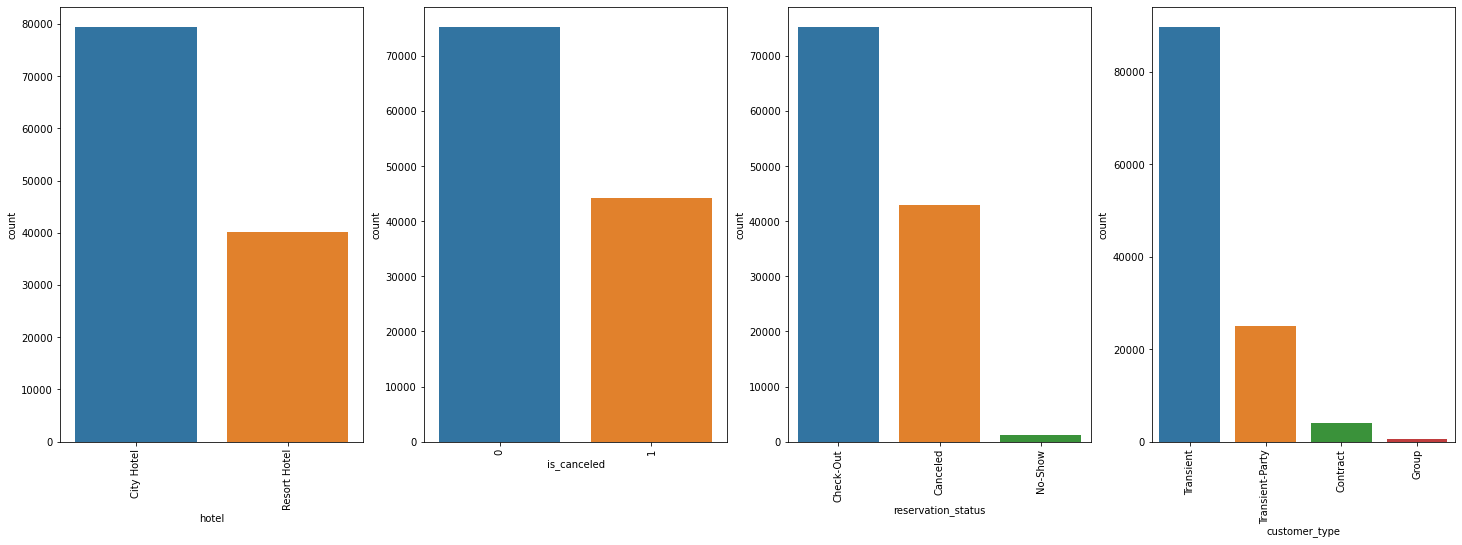

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(25, 8)) 
col = ['hotel','is_canceled','reservation_status','customer_type']

for cnt, ax in enumerate(axes):
    sns.countplot(x=col[cnt], data=hotel_data, ax=ax, order=hotel_data[col[cnt]].value_counts().index);

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

## Data Preprocessing 
1. impute missing values
    * impute mean value of column for integer/float type of variable and mode value of column for categorical data type of variable  
    * Label Encoding to transform categorical data into numerical data for model building

In [4]:
# check missing values data 
data_null = hotel_data.shape[0]-hotel_data.dropna().shape[0]
print("Total missing values in the dataset:", data_null)


Total missing values in the dataset: 119173


** There are 4 columns which is having missing values out of 32 columns in the dataset

In [5]:
# checking missing values in the specific columns
hotel_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
# checking missing values 4 columns data type to impute missing values 
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

** country column is having categorical data type and rest 3 having float type data type

In [7]:
# impute missing values 

# imputing mode for categorical country column data 
mode_country = hotel_data.country.mode()
hotel_data.country.fillna(mode_country[0],inplace=True)
 
# impute mean of Children in missing values
mean_children = hotel_data.children.mean()
hotel_data.children.fillna(mean_children,inplace=True)

# impute mean of agent in missing values
mean_agent = hotel_data.agent.mean()
hotel_data.agent.fillna(mean_agent,inplace=True)

# impute mean of company in missing values
mean_company = hotel_data.company.mean()
hotel_data.company.fillna(mean_company,inplace=True)

In [8]:
# checking target class 
hotel_data.is_canceled.value_counts()/hotel_data.shape[0]

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

1. here 0 mean booking is not canceled and 1 means booking got canceled 
    * 62.95 % booking were not canceled and 37.04 % were canceled 

### Label Encoding : One hot encoding 
    * tranform categorical data into numerical data

In [9]:
# dump hotel data into data frame any changes should reflect into df1 data frame not in original hotel_data
df1 = hotel_data.copy()
# load sklearn to encode all objects type variable
from sklearn import preprocessing

for x in df1.columns:
    if df1[x].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df1[x].values))
        df1[x]= lbl.transform(list(df1[x].values))

## ML Model : logistic regression with one hot encoding
1. Analysing the siginificant variables in the model
    * Removing those variables having probability value is greater than 0.05
2. Build a classification model analyse the results through confusion matrix and ROC curve


In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [11]:
target_var= df1['is_canceled']
train_data = df1.drop('is_canceled',axis=1)
x1= sm.add_constant(train_data)
model = sm.Logit(target_var,x1)

In [12]:
result = model.fit()
print(result.summary())

         Current function value: 0.101452
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:               119390
Model:                          Logit   Df Residuals:                   119358
Method:                           MLE   Df Model:                           31
Date:                Wed, 21 Jul 2021   Pseudo R-squ.:                  0.8461
Time:                        11:34:39   Log-Likelihood:                -12112.
converged:                      False   LL-Null:                       -78699.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.185e+04   2316.332    -31.020      0.000   -7.64e+04   -6.73e+04
hotel                             -0.4291      0.059     -7.316      0.

In [13]:
# droping the insignificant variables from the data
df_significant = df1.drop(['children','babies','meal','distribution_channel','agent','company','required_car_parking_spaces','reservation_status_date'],axis=1)

In [14]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [15]:
x = df_significant.drop('is_canceled',axis=1)
y = df_significant['is_canceled']

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [17]:
model = LogisticRegression()
result = model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
y_predict = result.predict(x_test)
confusion_matrix(y_test,y_predict)

array([[13100,  1904],
       [ 2640,  6234]], dtype=int64)

In [19]:
score = accuracy_score(y_test,y_predict)
print("%.2f"%score)

0.81


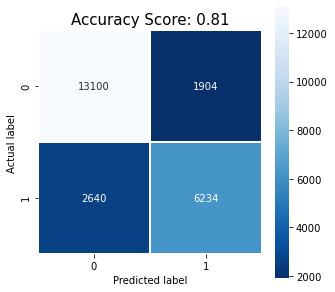

In [20]:
# Confusion matrix
cm =confusion_matrix(y_test,y_predict)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f",linewidths=.5, square = True, cmap = 'Blues_r');
#sns.heatmap(cm,annot=True, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.2f}'.format(score)
plt.title(all_sample_title, size = 15);

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85     15004
           1       0.77      0.70      0.73      8874

    accuracy                           0.81     23878
   macro avg       0.80      0.79      0.79     23878
weighted avg       0.81      0.81      0.81     23878



In [23]:
y_prob_train = result.predict_proba(x)[:,1]
y_predict_train = result.predict(x)
y_prob_test = result.predict_proba(x_test)[:,1]
y_predict = result.predict(x_test)

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc

# Roc curve for training data
Log_roc_auc = roc_auc_score(y,y_predict_train)
fpr1,tpr1,theresold = roc_curve(y,y_prob_train)
roc_auc1 = auc(fpr1,tpr1)

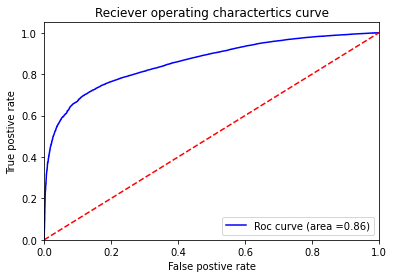

In [25]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr1,tpr1,color ='blue', label = 'Roc curve (area =%0.2f)' % roc_auc1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.title('Reciever operating charactertics curve')
plt.legend(loc='lower right')
plt.show()

In [26]:
# probability of a booking geeting canceled
input_data = x_test.iloc[25:30:,]
input_data

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,country,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,total_of_special_requests,reservation_status
47132,0,41,2016,3,7,9,0,2,1,43,...,0,0,0,0,0,0,2,57.83,1,1
112997,0,113,2017,8,22,30,0,2,2,15,...,0,0,0,0,0,0,2,103.95,1,1
12627,1,154,2017,5,27,8,4,7,2,59,...,0,4,4,0,0,0,2,176.18,1,0
114438,0,21,2017,6,25,18,2,2,2,81,...,0,0,0,0,0,0,2,99.00,0,1
16000,1,146,2015,1,32,3,2,5,1,124,...,0,0,0,1,0,0,0,120.38,1,1


In [27]:
prob_cancel = result.predict_proba(input_data)
for i in range(len(prob_cancel)):
    print('{:.4f}'.format(prob_cancel[i,0]))

0.8155
0.7601
0.7573
0.5636
0.3350


# ML model with Dummy Encoding 
1. Build a classification model analyse the results through confusion matrix and ROC curve


In [28]:
# reservation status date is date and does not contribute to anything in the data 
df = hotel_data.drop('reservation_status_date',axis=1)

In [29]:
df_final = pd.get_dummies(df)

In [30]:
df_final.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,0,342,2015,27,1,0,0,2,0.0,0,...,1,0,0,0,0,1,0,0,1,0
1,0,737,2015,27,1,0,0,2,0.0,0,...,1,0,0,0,0,1,0,0,1,0
2,0,7,2015,27,1,0,1,1,0.0,0,...,1,0,0,0,0,1,0,0,1,0
3,0,13,2015,27,1,0,1,1,0.0,0,...,1,0,0,0,0,1,0,0,1,0
4,0,14,2015,27,1,0,2,2,0.0,0,...,1,0,0,0,0,1,0,0,1,0


In [31]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [32]:
x=df_final.iloc[:,1:]
y=df_final['is_canceled']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [33]:
model = LogisticRegression(solver='lbfgs')
result = model.fit(x_train,y_train.ravel())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
y_predict = result.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test,y_predict)
score1

0.9932573917413519

In [36]:
confusion_matrix(y_test,y_predict)


array([[15021,    32],
       [  129,  8696]], dtype=int64)

In [37]:
# y_predict = result.predict(x_train)
# score = accuracy_score(y_train,y_predict)
# score

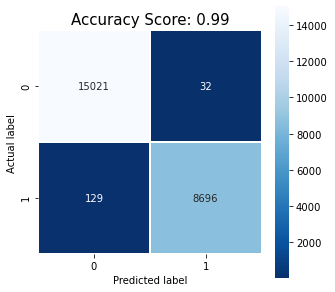

In [39]:
# confusion matrix
cm =confusion_matrix(y_test,y_predict)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f",linewidths=.5, square = True, cmap = 'Blues_r');
#sns.heatmap(cm,annot=True, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.2f}'.format(score1)
plt.title(all_sample_title, size = 15);

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[15021,    32],
       [  129,  8696]], dtype=int64)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15053
           1       1.00      0.99      0.99      8825

    accuracy                           0.99     23878
   macro avg       0.99      0.99      0.99     23878
weighted avg       0.99      0.99      0.99     23878



In [42]:
y_prob_train = result.predict_proba(x)[:,1]
y_predict_train = result.predict(x)


In [43]:
y_prob_train = result.predict_proba(x)[:,1]
y_predict_train = result.predict(x)
y_prob_test = result.predict_proba(x_test)[:,1]
y_predict = result.predict(x_test)

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc

# Roc curve for training data

Log_roc_auc = roc_auc_score(y,y_predict_train)
fpr1,tpr1,theresold = roc_curve(y,y_prob_train)
roc_auc1 = auc(fpr1,tpr1)

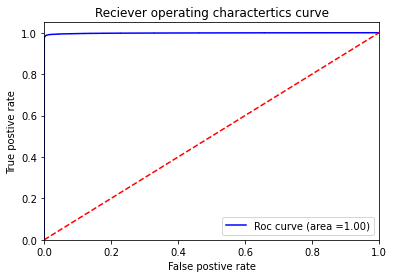

In [45]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr1,tpr1,color ='blue', label = 'Roc curve (area =%0.2f)' % roc_auc1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.title('Reciever operating charactertics curve')
plt.legend(loc='lower right')
plt.show()

In [46]:
input_data = x_test.iloc[25:30:,]
input_data

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
82016,115,2016,13,20,2,0,1,0.0,0,0,...,0,1,0,0,0,1,0,1,0,0
111251,4,2017,18,6,1,1,2,0.0,0,0,...,1,0,0,0,0,1,0,0,1,0
117284,8,2017,31,1,0,1,2,0.0,0,0,...,1,0,0,0,0,1,0,0,1,0
66485,130,2017,16,21,0,2,2,0.0,0,0,...,0,1,0,0,0,1,0,1,0,0
85207,7,2016,28,6,0,2,1,0.0,0,1,...,0,1,0,0,0,0,1,0,1,0


In [47]:
prob_cancel = result.predict_proba(input_data)
#print('{:.2f}'.format(prob_cancel[0:,0]))
prob_cancel[0,0]

4.962587674128827e-09

In [48]:
for i in range(len(prob_cancel)):
    #print(i)
    print('{:.4f}'.format(prob_cancel[i,0]))

0.0000
0.9998
0.9928
0.0000
1.0000


# Approach: Number of booking hotel will get in future
1. Time series forecating
    * tranform data into time series and decompose the time series into trend seasonalty and apply ARIMA model to predict
    * this time series analysis is only for Resort Hotel

In [49]:
data_resort = hotel_data[hotel_data['hotel']=='Resort Hotel']

In [50]:
df=data_resort.groupby('reservation_status_date')['hotel'].count().reset_index()

In [51]:
df['number of bookings']= df['hotel']

In [52]:
df= df.drop('hotel',axis=1)

In [53]:
df

,reservation_status_date,number of bookings
0,2014-11-18,1
1,2015-01-01,3
2,2015-01-02,16
3,2015-01-18,1
4,2015-01-21,91
...,...,...
908,2017-09-08,4
909,2017-09-09,6
910,2017-09-10,4
911,2017-09-12,1


In [54]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [55]:
#set for indexs 
df = df.set_index('reservation_status_date')
df.index


DatetimeIndex(['2014-11-18', '2015-01-01', '2015-01-02', '2015-01-18',
               '2015-01-21', '2015-01-22', '2015-01-28', '2015-01-29',
               '2015-01-30', '2015-02-02',
               ...
               '2017-09-03', '2017-09-04', '2017-09-05', '2017-09-06',
               '2017-09-07', '2017-09-08', '2017-09-09', '2017-09-10',
               '2017-09-12', '2017-09-14'],
              dtype='datetime64[ns]', name='reservation_status_date', length=913, freq=None)

In [56]:
y = df['number of bookings'].resample('MS').sum()

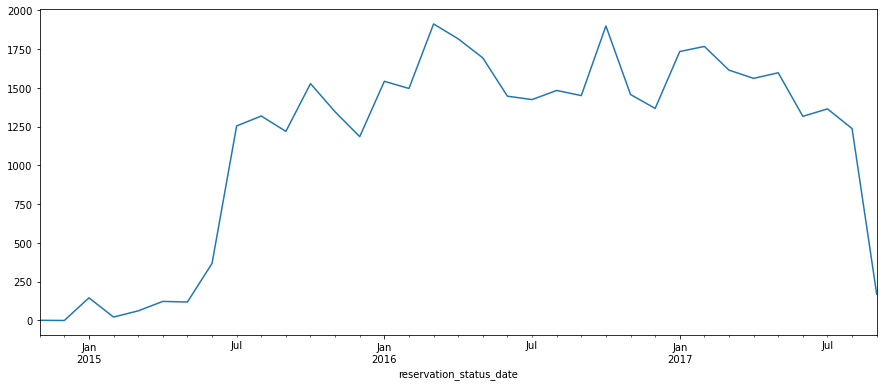

In [57]:
y.plot(figsize=(15, 6))
plt.show()

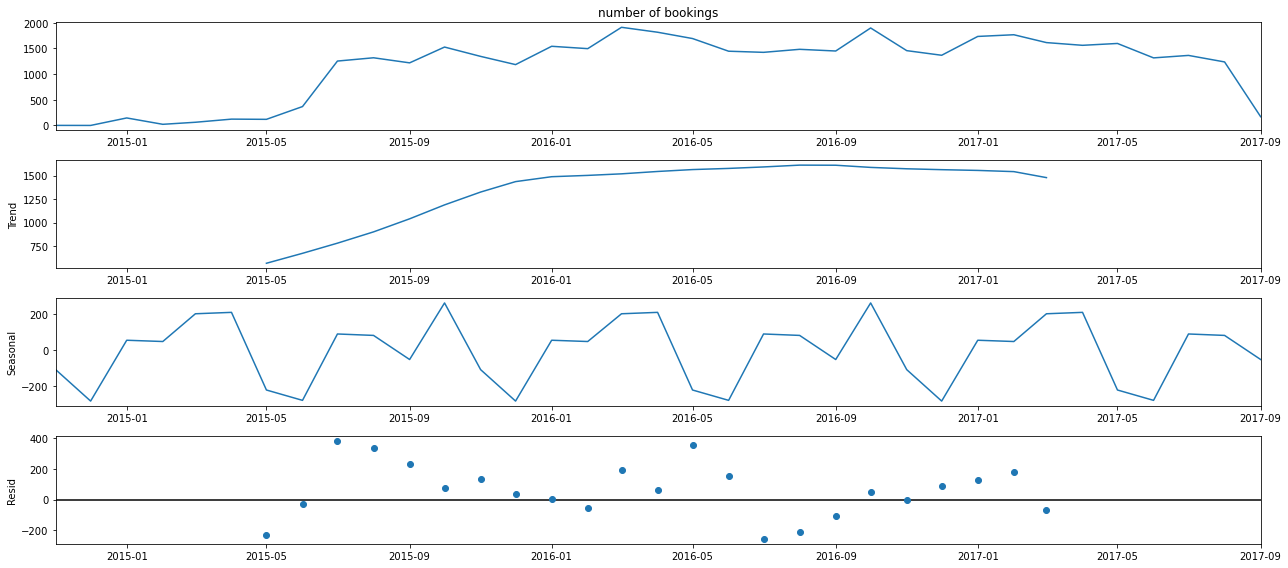

In [58]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()